In [1]:
import tensorflow as tf
import read_cifar10 as cf10
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
x_train = np.random.normal(loc = 0.0,scale = 0.2,size = [1000,1024])
for row in x_train:
    for col in row:
        if col>1 or col<-1:
            print(col)

-1.02673236415


In [3]:
import read_cifar10 as cf10

#@read_data.restartable
def cifar10_dataset_generator(dataset_name, batch_size, restrict_size=50000):
    assert dataset_name in ['train', 'test']
    assert batch_size > 0 or batch_size == -1  # -1 for entire dataset
    
    X_all_unrestricted, y_all = (cf10.load_training_data() if dataset_name == 'train'
                                 else cf10.load_test_data())
    
    actual_restrict_size = restrict_size if dataset_name == 'train' else int(1e10)
    #actual_restrict_size = 50000
    X_all = X_all_unrestricted[:actual_restrict_size]
    data_len = X_all.shape[0]
    batch_size = batch_size if batch_size > 0 else data_len
    
    X_all_padded = np.concatenate([X_all, X_all[:batch_size]], axis=0)
    y_all_padded = np.concatenate([y_all, y_all[:batch_size]], axis=0)
    
    for slice_i in range(math.ceil(data_len / batch_size)):
        idx = slice_i * batch_size
        #X_batch = X_all_padded[idx:idx + batch_size]
        X_batch = X_all_padded[idx:idx + batch_size]*255  # bugfix: thanks Zezhou Sun!
        y_batch = np.ravel(y_all_padded[idx:idx + batch_size])
        yield X_batch.astype(np.uint8), y_batch.astype(np.uint8)

cifar10_dataset_generators = {
    'train': cifar10_dataset_generator('train', 1000),
    'test': cifar10_dataset_generator('test', -1)
}

In [4]:
def rnn_model():
    with tf.Graph().as_default() as g:
        x = tf.placeholder(tf.float32,[None,1024])
        y = tf.placeholder(tf.float32,[None,1024])
        
        w1 = {}
        w2 = {}
        w3 = {}
        w4 = {}
        w5 = {}
        w6 = {}
        w7 = {}
        
        b1 = {}
        b2 = {}
        b3 = {}
        b4 = {}
        b5 = {}
        b6 = {}
        b7 = {}
        
        layer_string = 'layer'
        
        with tf.variable_scope('layer_1'):
            w1 = tf.get_variable('w1',[1024,512],tf.float32)
            b1 = tf.get_variable('b1',[512],tf.float32)
            
            w2 = tf.get_variable('w2',[512,512],tf.float32)
            b2 = tf.get_variable('b2',[512],tf.float32)
            
            w3 = tf.get_variable('w3',[512,512],tf.float32)
            b3 = tf.get_variable('b3',[512],tf.float32)
            
            w4 = tf.get_variable('w4',[512,4],tf.float32)
            b4 = tf.get_variable('b4',[4],tf.float32)
            
            w5 = tf.get_variable('w5',[4,512],tf.float32)
            b5 = tf.get_variable('b5',[512],tf.float32)
            
            w6 = tf.get_variable('w6',[512,512],tf.float32)
            b6 = tf.get_variable('b6',[512],tf.float32)
            
            w7 = tf.get_variable('w7',[512,1024],tf.float32)
            b7 = tf.get_variable('b7',[1024],tf.float32)
            
            h1 = tf.nn.tanh(tf.matmul(x,w1)+b1)
            h2 = tf.nn.tanh(tf.matmul(h1,w2)+b2)
            h3 = tf.nn.tanh(tf.matmul(h2,w3)+b3)
            h4 = tf.nn.tanh(tf.matmul(h3,w4)+b4)
            h5 = tf.nn.tanh(tf.matmul(h4,w5)+b5)
            h6 = tf.nn.tanh(tf.matmul(h5,w6)+b6)
            h7 = tf.nn.tanh(tf.matmul(h6,w7)+b7)
        
        residual_1 = tf.subtract(x,h7)
            
        with tf.variable_scope('layer_2'):
            w8 = tf.get_variable('w1',[1024,512],tf.float32)
            b8 = tf.get_variable('b1',[512],tf.float32)
            
            w9 = tf.get_variable('w2',[512,512],tf.float32)
            b9 = tf.get_variable('b2',[512],tf.float32)
            
            w10 = tf.get_variable('w3',[512,512],tf.float32)
            b10 = tf.get_variable('b3',[512],tf.float32)
            
            w11 = tf.get_variable('w4',[512,4],tf.float32)
            b11 = tf.get_variable('b4',[4],tf.float32)
            
            w12 = tf.get_variable('w5',[4,512],tf.float32)
            b12 = tf.get_variable('b5',[512],tf.float32)
            
            w13 = tf.get_variable('w6',[512,512],tf.float32)
            b13 = tf.get_variable('b6',[512],tf.float32)
            
            w14 = tf.get_variable('w7',[512,1024],tf.float32)
            b14 = tf.get_variable('b7',[1024],tf.float32)
            
            h8 = tf.nn.tanh(tf.matmul(residual_1,w8)+b8)
            h9 = tf.nn.tanh(tf.matmul(h8,w9)+b9)
            h10 = tf.nn.tanh(tf.matmul(h9,w10)+b10)
            h11 = tf.nn.tanh(tf.matmul(h10,w11)+b11)
            h12 = tf.nn.tanh(tf.matmul(h11,w12)+b12)
            h13 = tf.nn.tanh(tf.matmul(h12,w13)+b13)
            h14 = tf.nn.tanh(tf.matmul(h13,w14)+b14)
            
        residual_2 = tf.subtract(h14,residual_1)
        
        with tf.variable_scope('layer_3'):
            w15 = tf.get_variable('w1',[1024,512],tf.float32)
            b15 = tf.get_variable('b1',[512],tf.float32)
            
            w16 = tf.get_variable('w2',[512,512],tf.float32)
            b16 = tf.get_variable('b2',[512],tf.float32)
            
            w17 = tf.get_variable('w3',[512,512],tf.float32)
            b17 = tf.get_variable('b3',[512],tf.float32)
            
            w18 = tf.get_variable('w4',[512,4],tf.float32)
            b18 = tf.get_variable('b4',[4],tf.float32)
            
            w19 = tf.get_variable('w5',[4,512],tf.float32)
            b19 = tf.get_variable('b5',[512],tf.float32)
            
            w20 = tf.get_variable('w6',[512,512],tf.float32)
            b20 = tf.get_variable('b6',[512],tf.float32)
            
            w21 = tf.get_variable('w7',[512,1024],tf.float32)
            b21 = tf.get_variable('b7',[1024],tf.float32)
            
            h15 = tf.nn.tanh(tf.matmul(residual_2,w15)+b15)
            h16 = tf.nn.tanh(tf.matmul(h15,w16)+b16)
            h17 = tf.nn.tanh(tf.matmul(h16,w17)+b17)
            h18 = tf.nn.tanh(tf.matmul(h17,w18)+b18)
            h19 = tf.nn.tanh(tf.matmul(h18,w19)+b19)
            h20 = tf.nn.tanh(tf.matmul(h19,w20)+b20)
            h21 = tf.nn.tanh(tf.matmul(h20,w21)+b21)
        
        residual_3 = tf.subtract(h21,residual_2)
            
        with tf.variable_scope('layer_4'):
            w1 = tf.get_variable('w1',[1024,512],tf.float32)
            b1 = tf.get_variable('b1',[512],tf.float32)
            
            w2 = tf.get_variable('w2',[512,512],tf.float32)
            b2 = tf.get_variable('b2',[512],tf.float32)
            
            w3 = tf.get_variable('w3',[512,512],tf.float32)
            b3 = tf.get_variable('b3',[512],tf.float32)
            
            w4 = tf.get_variable('w4',[512,4],tf.float32)
            b4 = tf.get_variable('b4',[4],tf.float32)
            
            w5 = tf.get_variable('w5',[4,512],tf.float32)
            b5 = tf.get_variable('b5',[512],tf.float32)
            
            w6 = tf.get_variable('w6',[512,512],tf.float32)
            b6 = tf.get_variable('b6',[512],tf.float32)
            
            w7 = tf.get_variable('w7',[512,1024],tf.float32)
            b7 = tf.get_variable('b7',[1024],tf.float32)
            
            h22 = tf.nn.tanh(tf.matmul(residual_3,w1)+b1)
            h23 = tf.nn.tanh(tf.matmul(h22,w2)+b2)
            h24 = tf.nn.tanh(tf.matmul(h23,w3)+b3)
            h25 = tf.nn.tanh(tf.matmul(h24,w4)+b4)
            h26 = tf.nn.tanh(tf.matmul(h25,w5)+b5)
            h27 = tf.nn.tanh(tf.matmul(h26,w6)+b6)
            h28 = tf.nn.tanh(tf.matmul(h27,w7)+b7)
        
        added_residual = h14+h7+h21+h28
        loss = tf.reduce_sum(tf.nn.l2_loss((added_residual - y)))
        optimizer = tf.train.AdamOptimizer(1.0).minimize(loss)
        
    return {'input':[x,y],'loss':loss,'optimizer':optimizer,'graph':g,'output':added_residual}

In [5]:
def dummy_rnn_model(time_iterations = 16,learning_rate = 0.1,activation_fn = tf.nn.tanh,stddev = 0.1):
    with tf.Graph().as_default() as g:
        x = tf.placeholder(tf.float32,[None,1024])
        y = tf.placeholder(tf.float32,[None,1024])
        
        w1 = {}
        w2 = {}
        w3 = {}
        w4 = {}
        w5 = {}
        w6 = {}
        w7 = {}
        w8 = {}
        
        b1 = {}
        b2 = {}
        b3 = {}
        b4 = {}
        b5 = {}
        b6 = {}
        b7 = {}
        b8 = {}
        
        h1 = {}
        h2 = {}
        h3 = {}
        h4 = {}
        h5 = {}
        h6 = {}
        h7 = {}
        h8 = {}
        
        residual = {}
        pseudo_loss = 0
        for i in range(time_iterations):   
            layer_string = 'layer'+str(i)
            with tf.variable_scope(layer_string):
                if(i == 0):
                    first = x
                else:
                    first = residual['residual'+str(i-1)]
                    
                w1['w1'+str(i)] = tf.get_variable('w1',[1024,512],tf.float32,tf.truncated_normal_initializer(stddev = stddev))
                b1['b1'+str(i)] = tf.get_variable('b1',[512],tf.float32)
                
                w2['w2'+str(i)] = tf.get_variable('w2',[512,512],tf.float32,tf.truncated_normal_initializer(stddev = stddev))
                b2['b2'+str(i)] = tf.get_variable('b2',[512],tf.float32)

                w3['w3'+str(i)] = tf.get_variable('w3',[512,512],tf.float32,tf.truncated_normal_initializer(stddev = stddev))
                b3['b3'+str(i)] = tf.get_variable('b3',[512],tf.float32)

                w4['w4'+str(i)] = tf.get_variable('w4',[512,32],tf.float32,tf.truncated_normal_initializer(stddev = stddev))
                b4['b4'+str(i)]= tf.get_variable('b4',[32],tf.float32)

                w5['w5'+str(i)] = tf.get_variable('w5',[32,512],tf.float32,tf.truncated_normal_initializer(stddev = stddev))
                b5['b5'+str(i)] = tf.get_variable('b5',[512],tf.float32)

                w6['w6'+str(i)] = tf.get_variable('w6',[512,512],tf.float32,tf.truncated_normal_initializer(stddev = stddev))
                b6['b6'+str(i)] = tf.get_variable('b6',[512],tf.float32)

                w7['w7'+str(i)] = tf.get_variable('w7',[512,512],tf.float32,tf.truncated_normal_initializer(stddev = stddev))
                b7['b7'+str(i)] = tf.get_variable('b7',[512],tf.float32)
                
                w8['w8'+str(i)] = tf.get_variable('w8',[512,1024],tf.float32,tf.truncated_normal_initializer(stddev = stddev))
                b8['b8'+str(i)] = tf.get_variable('b8',[1024],tf.float32)
                
                
                h1['h1'+str(i)] = activation_fn(tf.matmul(first,w1['w1'+str(i)])+b1['b1'+str(i)])
                h2['h2'+str(i)] = activation_fn(tf.matmul(h1['h1'+str(i)],w2['w2'+str(i)])+b2['b2'+str(i)])
                h3['h3'+str(i)] = activation_fn(tf.matmul(h2['h2'+str(i)],w3['w3'+str(i)])+b3['b3'+str(i)])
                h4['h4'+str(i)] = activation_fn(tf.matmul(h3['h3'+str(i)],w4['w4'+str(i)])+b4['b4'+str(i)])
                h5['h5'+str(i)] = activation_fn(tf.matmul(h4['h4'+str(i)],w5['w5'+str(i)])+b5['b5'+str(i)])
                h6['h6'+str(i)] = activation_fn(tf.matmul(h5['h5'+str(i)],w6['w6'+str(i)])+b6['b6'+str(i)])
                h7['h7'+str(i)] = activation_fn(tf.matmul(h6['h6'+str(i)],w7['w7'+str(i)])+b7['b7'+str(i)])
                h8['h8'+str(i)] = tf.matmul(h7['h7'+str(i)],w8['w8'+str(i)])+b8['b8'+str(i)]
                
                if(i == 0):
                    residual['residual'+str(i)] = x - h8['h8'+str(i)];
                else:
                    residual['residual'+str(i)] = h8['h8'+str(i)] - residual['residual'+str(i-1)]

                if(i == 0):
                    added_residual = h8['h8'+str(i)]
                else:
                    added_residual += h8['h8'+str(i)]

                pseudo_loss += tf.reduce_sum(tf.square(tf.norm(residual['residual'+str(i)])))
        #loss = tf.reduce_sum(tf.nn.l2_loss((added_residual - y)))
        
        #summary writing
        tf.summary.scalar('loss_mlp',pseudo_loss)
        #tf.summary.scalar('added_residual_mlp',added_residual)
        summary_total = tf.summary.merge_all()
        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(pseudo_loss)
        
    return {'input':[x,y],'loss':pseudo_loss,'optimizer':optimizer,'graph':g,'output':added_residual,'summary':summary_total}

In [6]:
def corrected_rnn_model(time_iterations = 16,learning_rate = 0.1,activation_fn = tf.nn.tanh):
    with tf.Graph().as_default() as g:
        x = tf.placeholder(tf.float32,[None,1024])
        y = tf.placeholder(tf.float32,[None,1024])
        
        w1 = {}
        w2 = {}
        w3 = {}
        w4 = {}
        w5 = {}
        w6 = {}
        w7 = {}
        w8 = {}
        
        b1 = {}
        b2 = {}
        b3 = {}
        b4 = {}
        b5 = {}
        b6 = {}
        b7 = {}
        b8 = {}
        
        h1 = {}
        h2 = {}
        h3 = {}
        h4 = {}
        h5 = {}
        h6 = {}
        h7 = {}
        h8 = {}
        
        residual = {}
        with tf.variable_scope('layers',reuse = True):
            w1 = tf.get_variable('w1',[1024,512],tf.float32,)
            b1 = tf.get_variable('b1',[512],tf.float32)

            w2 = tf.get_variable('w2',[512,512],tf.float32)
            b2 = tf.get_variable('b2',[512],tf.float32)

            w3 = tf.get_variable('w3',[512,512],tf.float32)
            b3 = tf.get_variable('b3',[512],tf.float32)

            w4 = tf.get_variable('w4',[512,32],tf.float32)
            b4 = tf.get_variable('b4',[32],tf.float32)

            w5 = tf.get_variable('w5',[32,512],tf.float32)
            b5 = tf.get_variable('b5',[512],tf.float32)

            w6 = tf.get_variable('w6',[512,512],tf.float32)
            b6 = tf.get_variable('b6',[512],tf.float32)

            w7 = tf.get_variable('w7',[512,512],tf.float32)
            b7 = tf.get_variable('b7',[512],tf.float32)
                
            w8 = tf.get_variable('w8',[512,1024],tf.float32)
            b8 = tf.get_variable('b8',[1024],tf.float32)
        
        for i in range(time_iterations):   
            if(i == 0):
                first = x
            else:
                first = residual['residual'+str(i-1)]
            h1 = tf.nn.tanh(tf.matmul(x,w1)+b1)
            h2 = tf.nn.tanh(tf.matmul(h1,w2)+b2)
            h3 = tf.nn.tanh(tf.matmul(h2,w3)+b3)
            h4 = tf.nn.tanh(tf.matmul(h3,w4)+b4)
            h5 = tf.nn.tanh(tf.matmul(h4,w5)+b5)
            h6 = tf.nn.tanh(tf.matmul(h5,w6)+b6)
            h7 = tf.nn.tanh(tf.matmul(h6,w7)+b7)
            h8 = tf.nn.tanh(tf.matmul(h7,w8)+b8)
            if(i == 0):
                residual['residual'+str(i)] = x - h8;
            else:
                residual['residual'+str(i)] = h8 - residual['residual'+str(i-1)]
            if(i == 0):
                added_residual = h8
            else:
                added_residual += h8
                
        loss = tf.reduce_sum(tf.nn.l2_loss((added_residual - y)))
        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
        
    return {'input':[x,y],'loss':loss,'optimizer':optimizer,'graph':g,'output':added_residual}

In [7]:
def train_model(data,model):
    with model['graph'].as_default() as g,tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for row in data:
            x_train = np.reshape(row,(1,1024))
            train_feed = dict(zip(model['input'],[x_train,x_train]))
            to_compute = [model['optimizer'],model['loss']]
            _,train_loss = sess.run(to_compute,feed_dict = train_feed)
            print(train_loss)

In [8]:
def convert_newrange(x):
    old_range = 1
    new_range = 1.8
    new_x = (x*new_range)-0.9
    return new_x

In [9]:
def train_cifar_model(model,epoch = 10):
    with model['graph'].as_default() as g,tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        grey_image = np.zeros((32,32))
        iteration = 0
        
        summary_writer = tf.summary.FileWriter('./logs/',graph = model['graph'])
        for _ in range(epoch):
            loss_list = []
            for row in cifar10_dataset_generator('train',1,1000):
                image = np.reshape(row[0],(32,32,3))
                old_grey_image = (0.299*image[:,:,0] + 0.587*image[:,:,1] + 0.114*image[:,:,2])/255
                grey_image = convert_newrange(old_grey_image)
                train_img = np.reshape(grey_image,(1,1024))
                train_feed = dict(zip(model['input'],[train_img,train_img]))
                to_compute = [model['optimizer'],model['loss'],model['output'],model['input'],model['summary']]
                _,train_loss,output_image,actual_image,summary_loss = sess.run(to_compute,feed_dict = train_feed)
                loss_list.append(train_loss)
                
                summary_writer.add_summary(summary_loss,iteration)
                
                if(iteration%200 == 0):
                    final_image = np.reshape(output_image,(32,32))
                    label_image = np.reshape(actual_image[1],(32,32))
                    plt.imshow(final_image,cmap = cm.Greys_r)
                    plt.show()
                    plt.imshow(label_image,cmap = cm.Greys_r)
                    plt.show()
                iteration = iteration + 1
            print("loss:",np.mean(np.array(loss_list)))
        

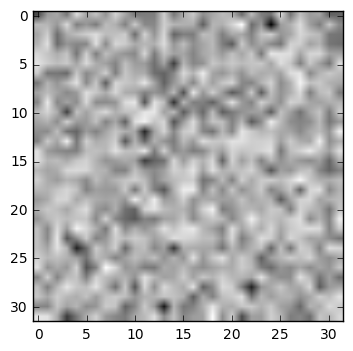

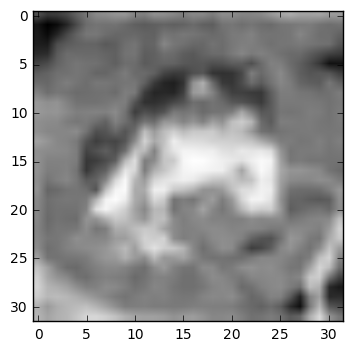

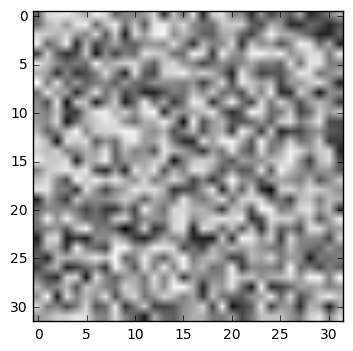

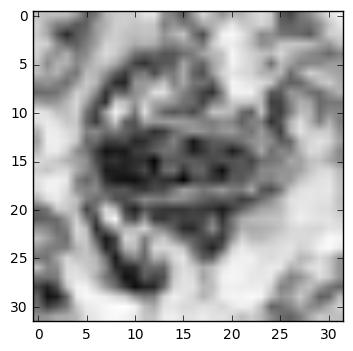

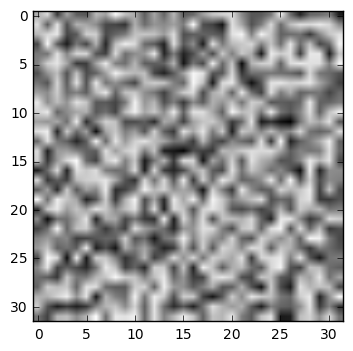

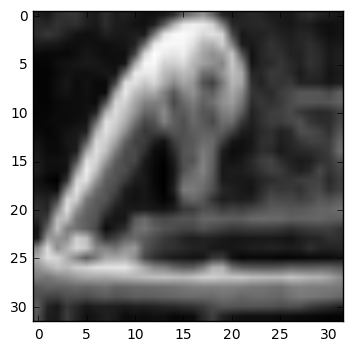

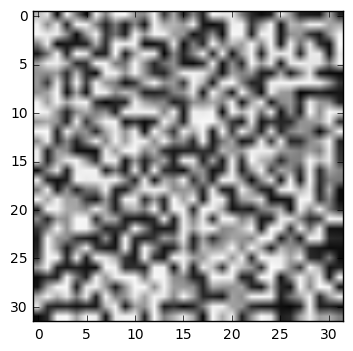

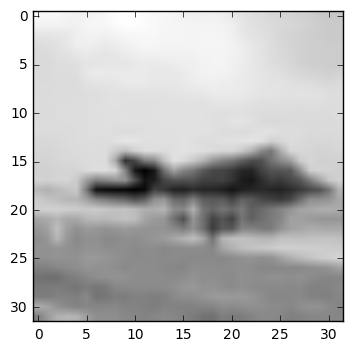

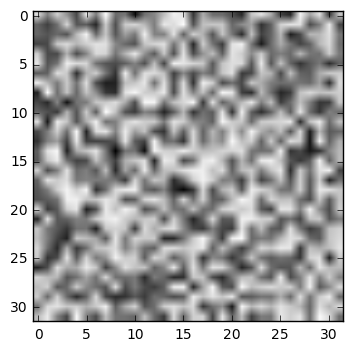

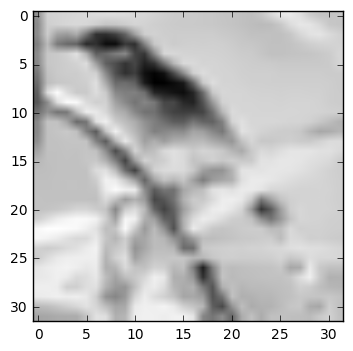

loss: 2.9088e+09


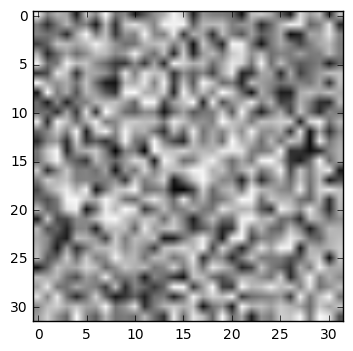

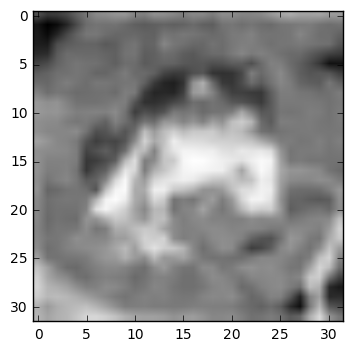

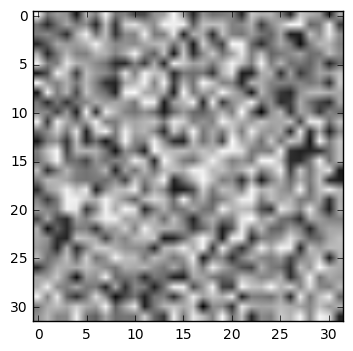

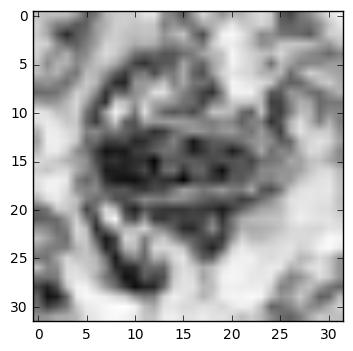

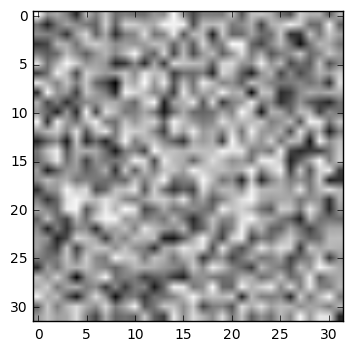

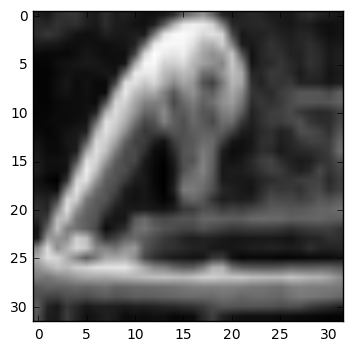

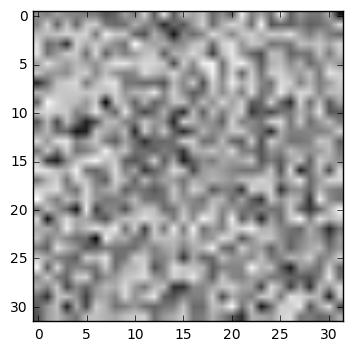

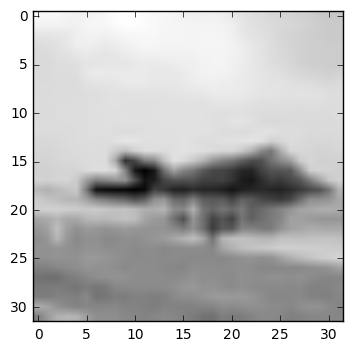

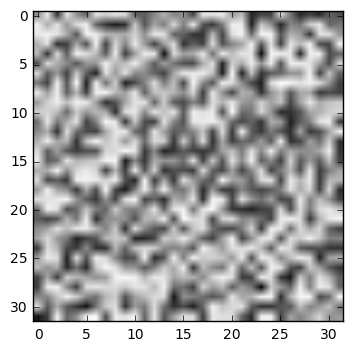

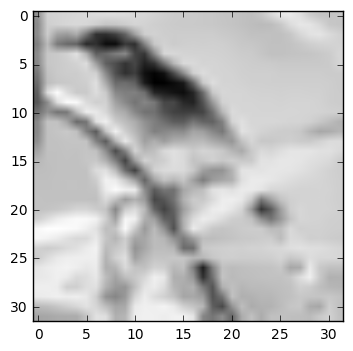

loss: 5.88578e+09


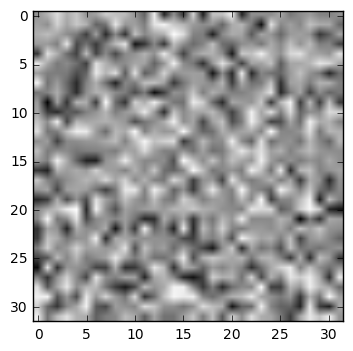

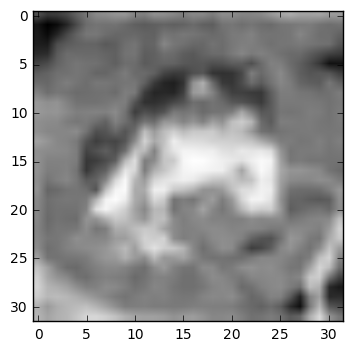

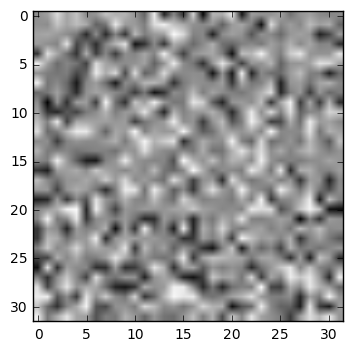

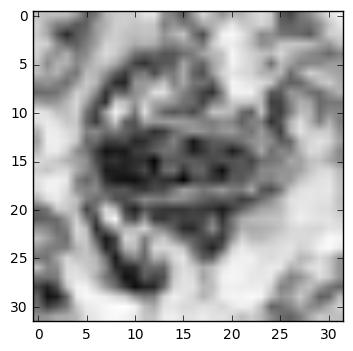

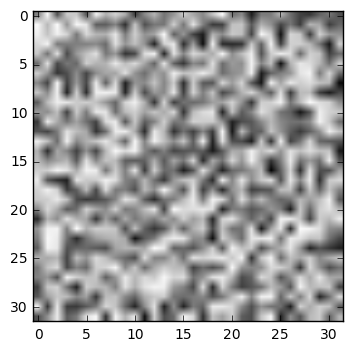

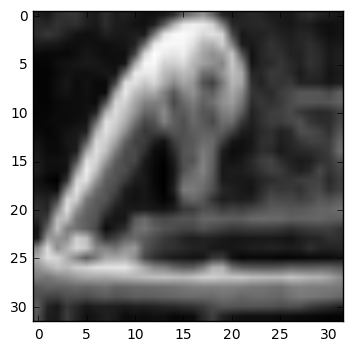

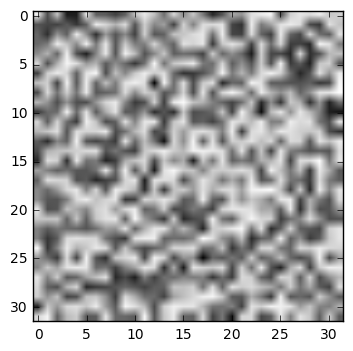

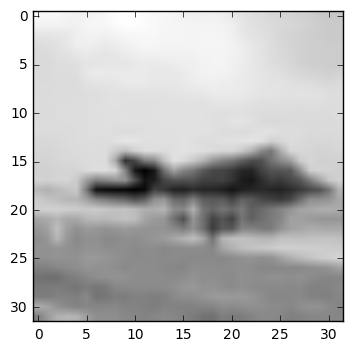

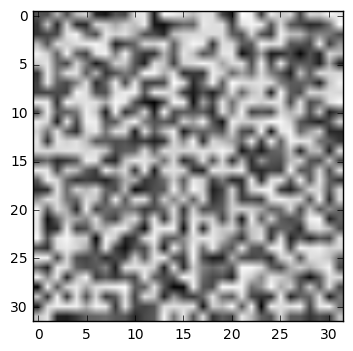

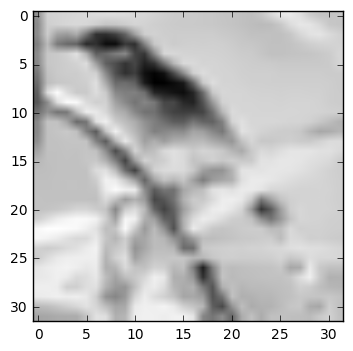

loss: 1.46192e+10


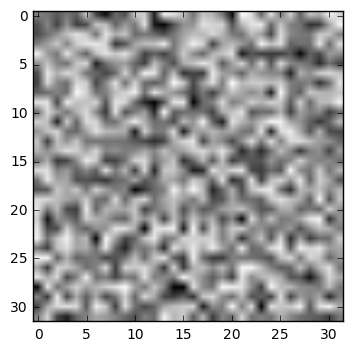

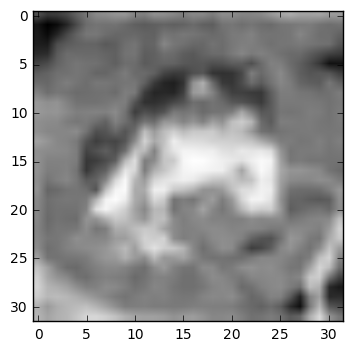

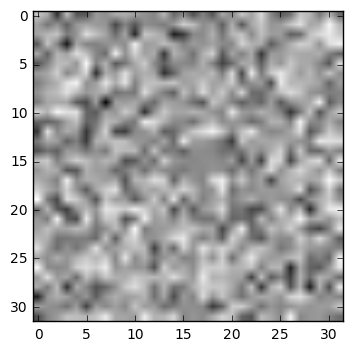

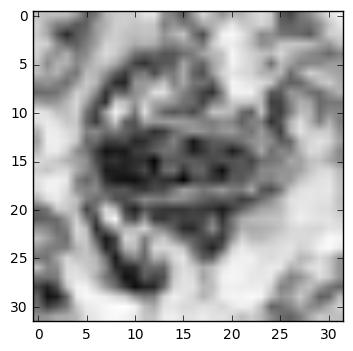

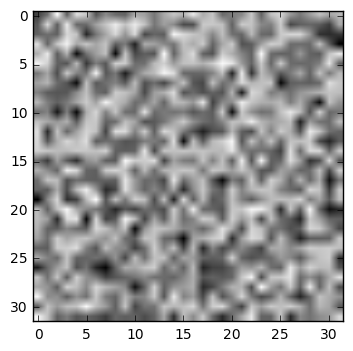

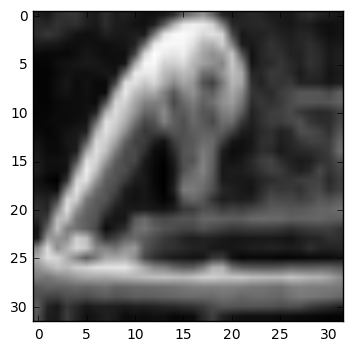

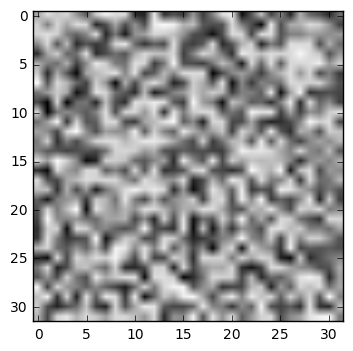

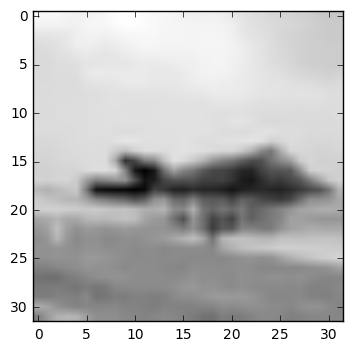

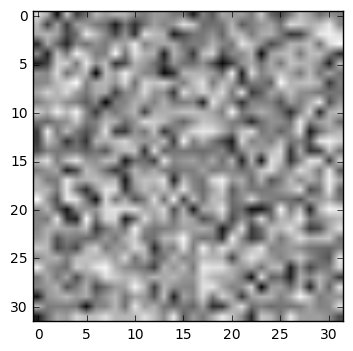

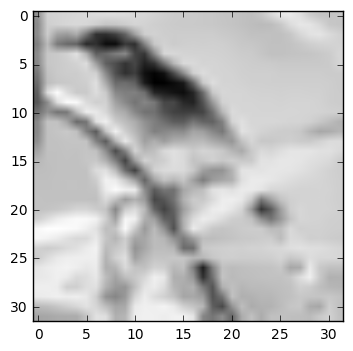

loss: 8.93189e+09


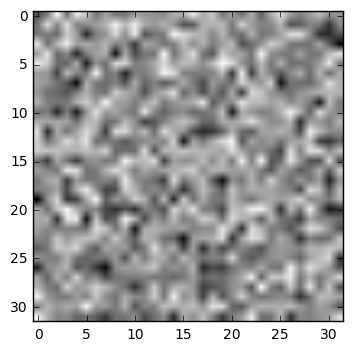

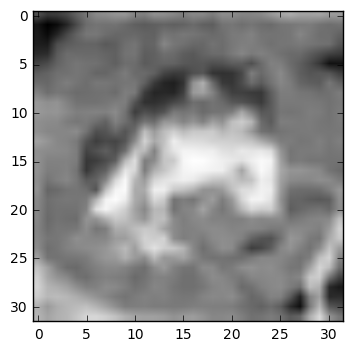

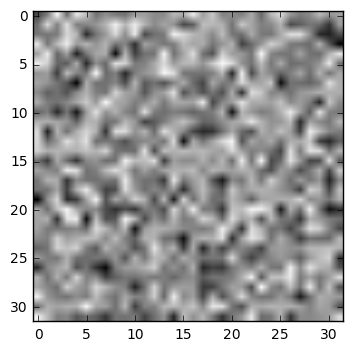

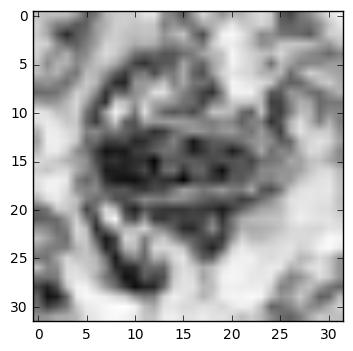

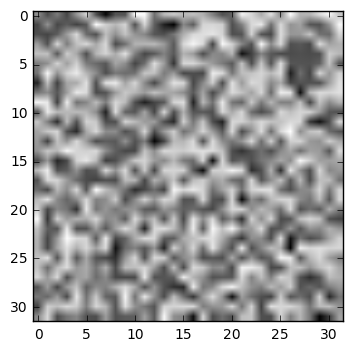

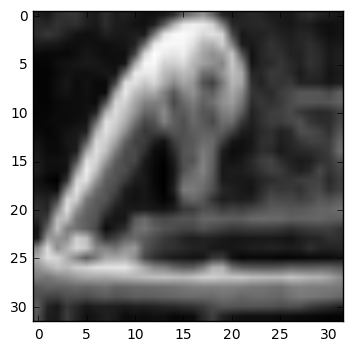

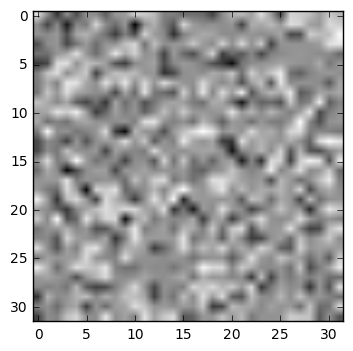

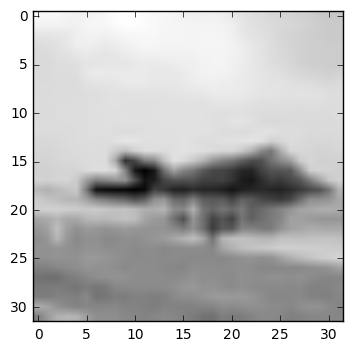

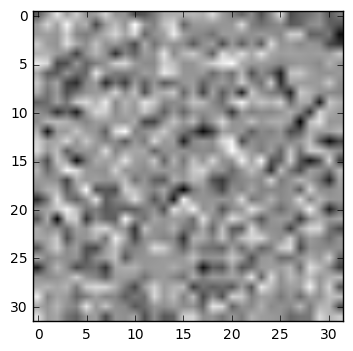

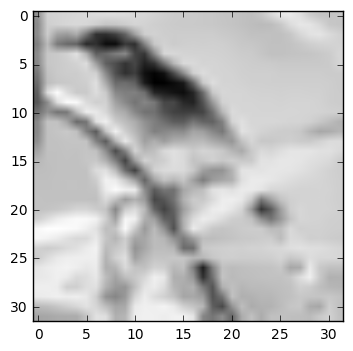

loss: 4.17429e+09


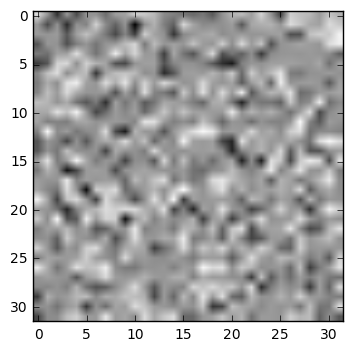

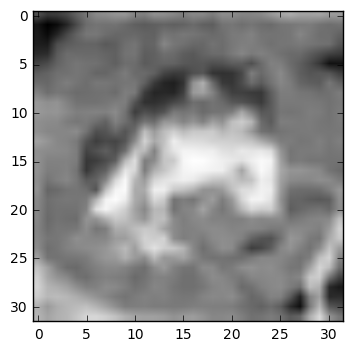

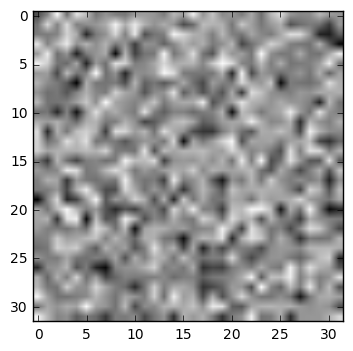

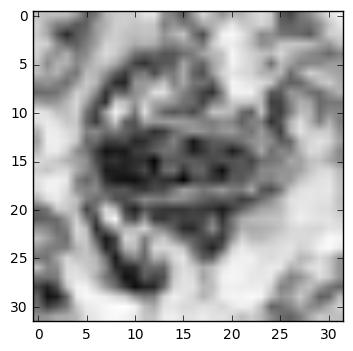

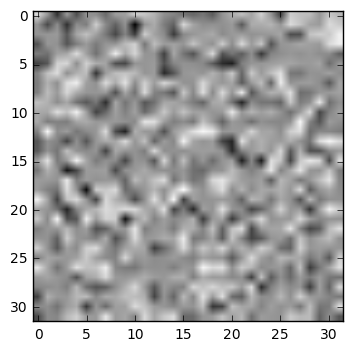

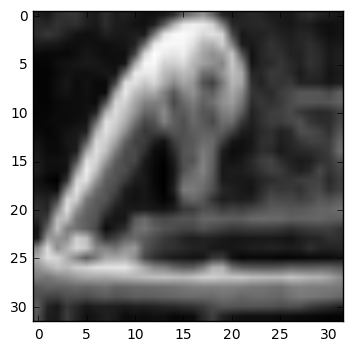

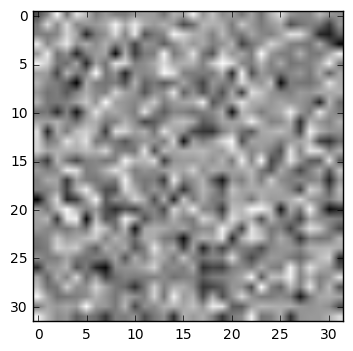

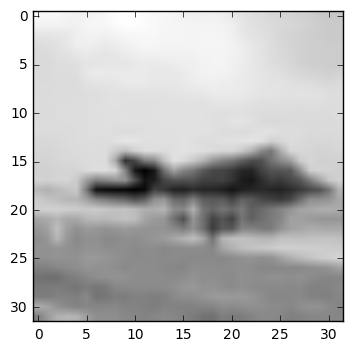

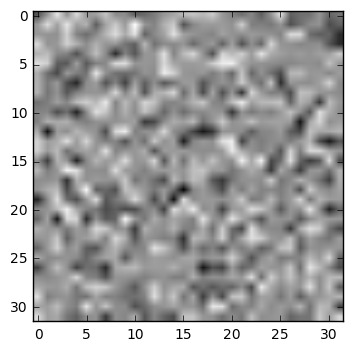

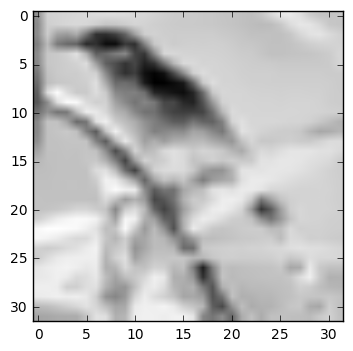

loss: 2.28974e+09


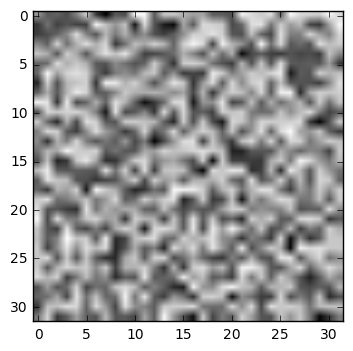

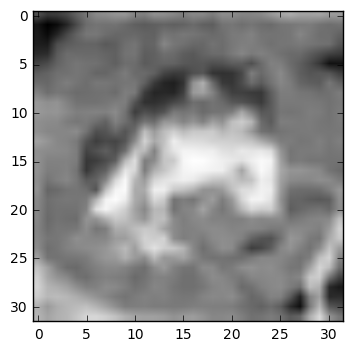

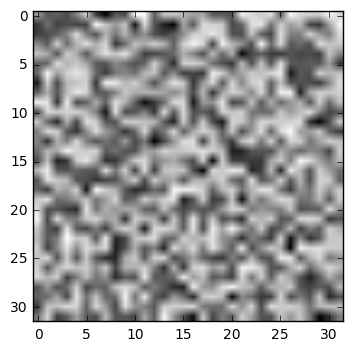

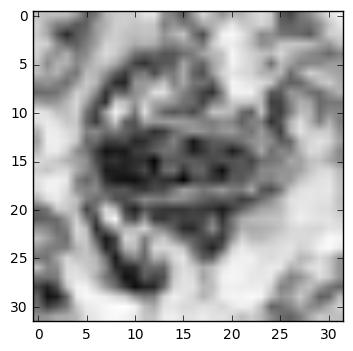

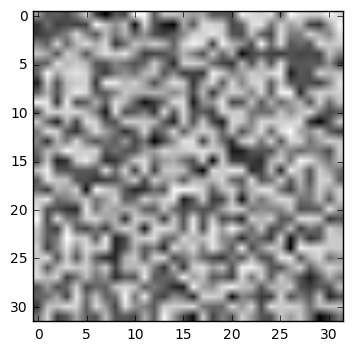

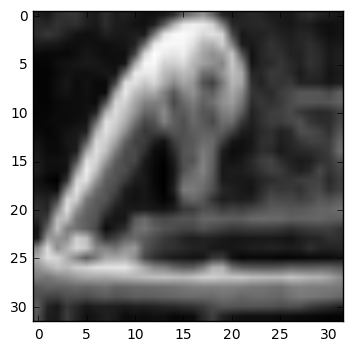

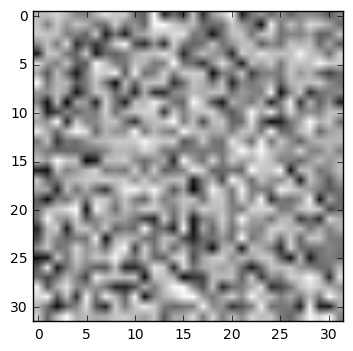

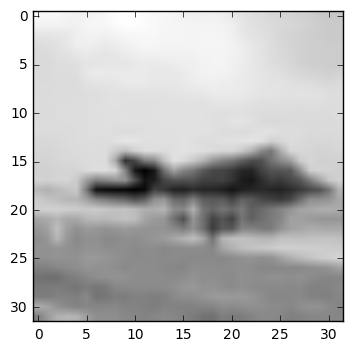

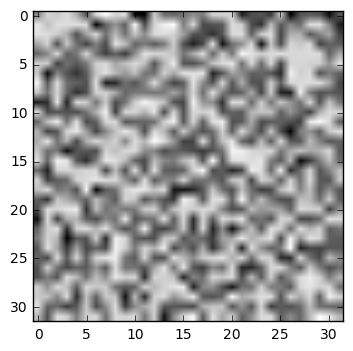

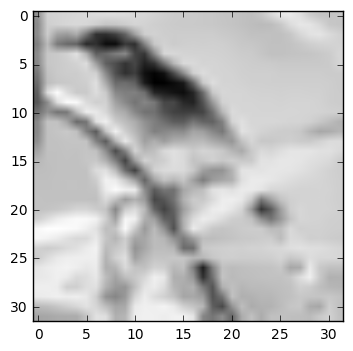

loss: 1.30463e+09


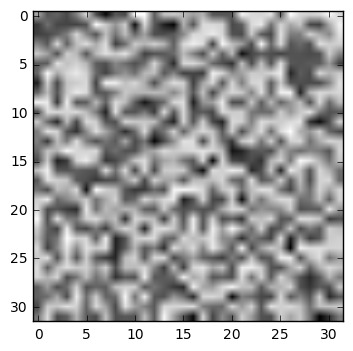

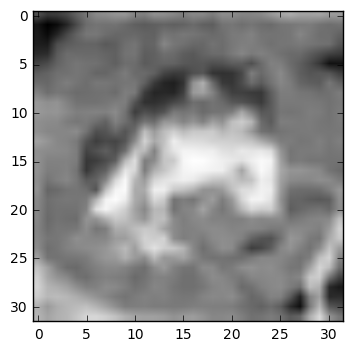

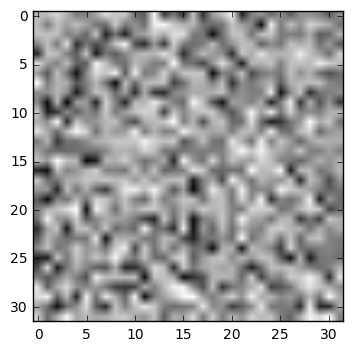

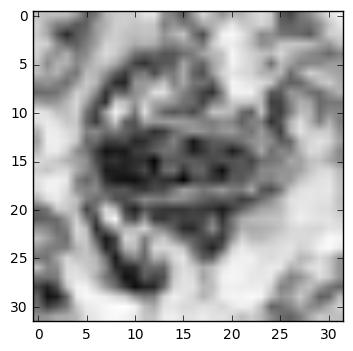

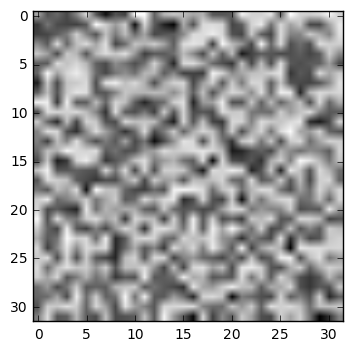

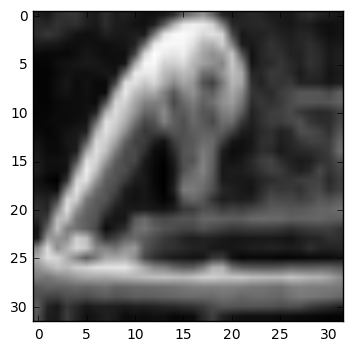

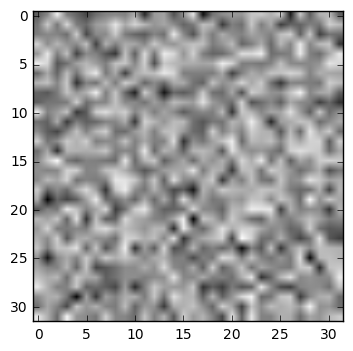

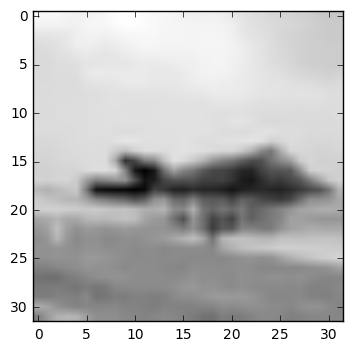

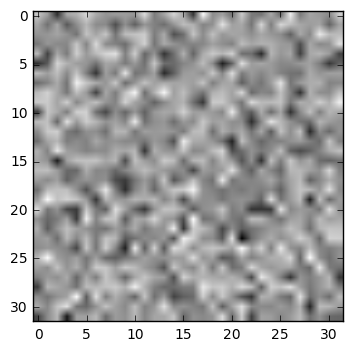

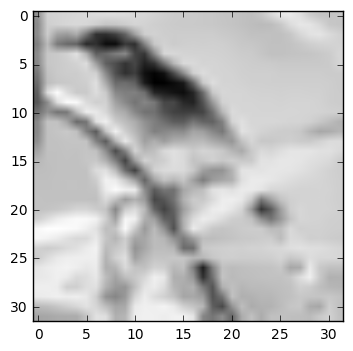

loss: 1.97238e+09


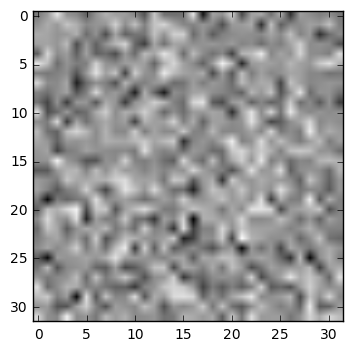

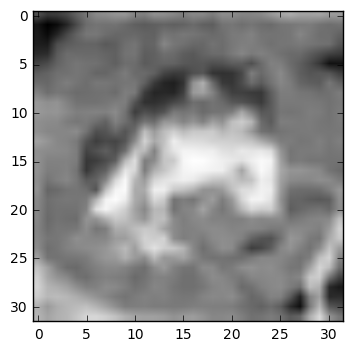

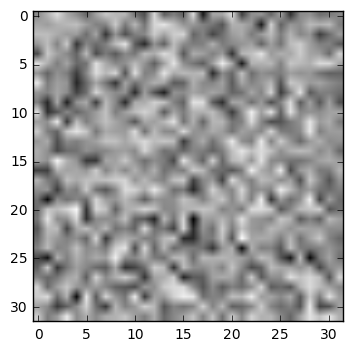

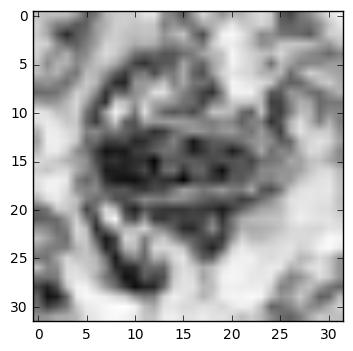

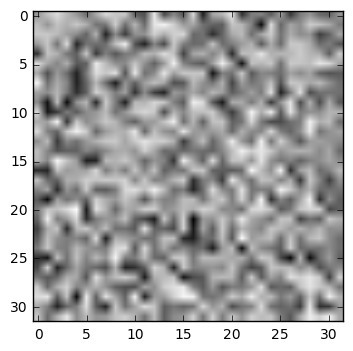

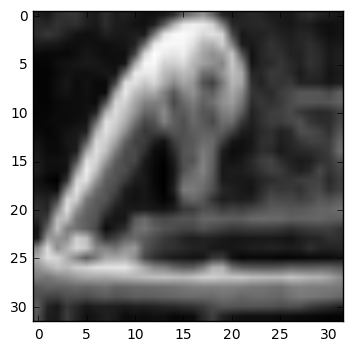

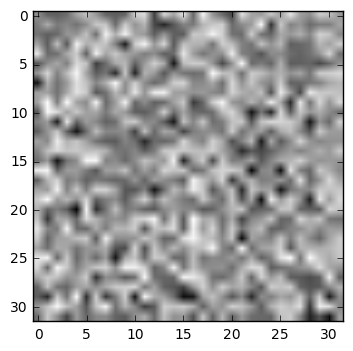

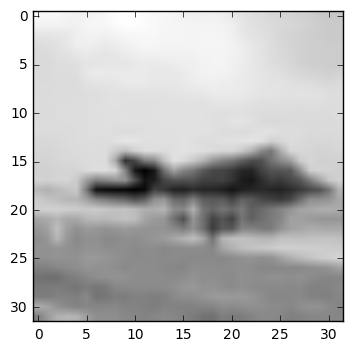

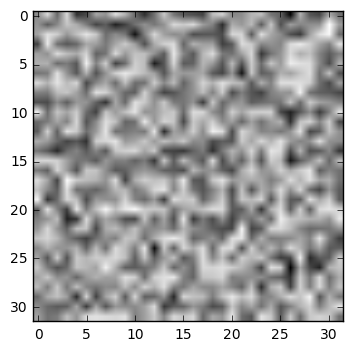

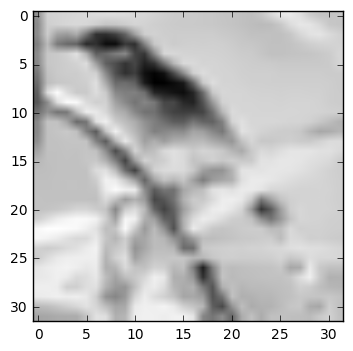

loss: 7.11477e+09


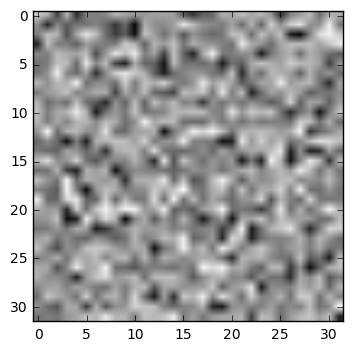

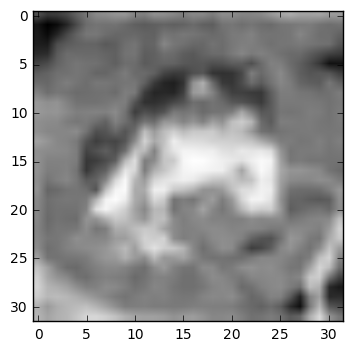

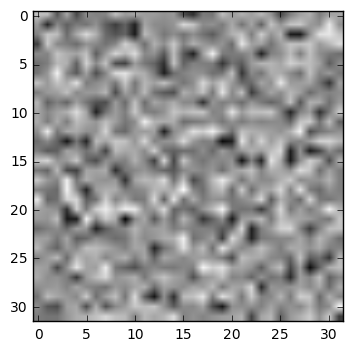

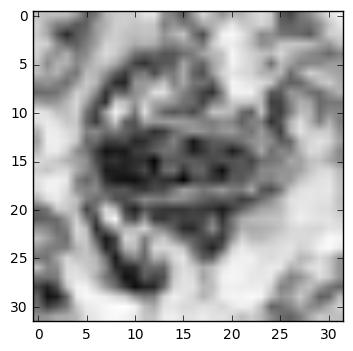

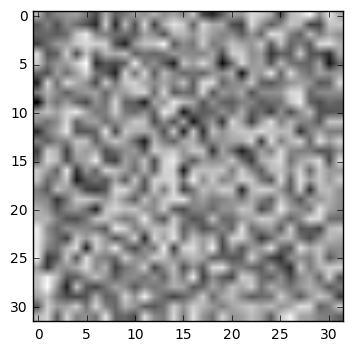

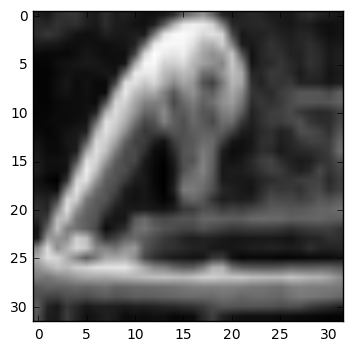

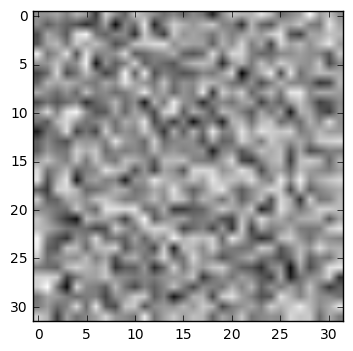

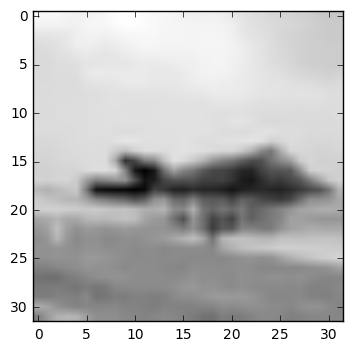

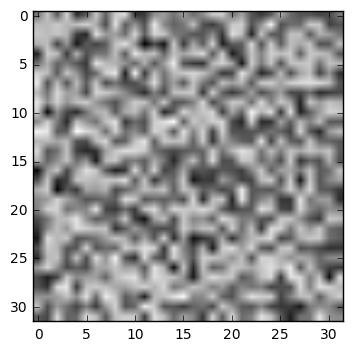

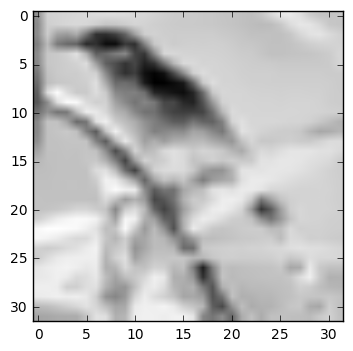

loss: 8.092e+09


In [11]:
cifar_model = dummy_rnn_model(time_iterations = 16,learning_rate = 0.05,activation_fn = tf.nn.tanh,stddev = 0.1)
#cifar_model = rnn_model()
#cifar_model = corrected_rnn_model(time_iterations = 16,learning_rate = 1.0,activation_fn = tf.nn.tanh)
train_cifar_model(cifar_model,epoch = 10)

In [ ]:
current_model = dummy_rnn_model(time_iterations = 16,learning_rate = 0.01,activation_fn = tf.nn.tanh)
train_model(x_train,current_model)